### Import Quasar catalog for DR16

In [2]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL="https://data.sdss.org/sas/dr16/eboss/qso/DR16Q/"
file="DR16Q_v4.fits"
local_dir="/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)


if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
       
catalog=Table.read('DR16Q_v4.fits')

#catalog.colnames
len(catalog)

/home/colgoat/Jupyter/DR16Q_v4.fits already exist


750414

### Filtering the data from FITS (name code,redshift, RA&DEC,MJD,BAL index) and sorting by plate

In [29]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC']) \
& (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) 

reduced_cat=catalog[w]
reduced_cat

#cat_by_plate=reduced_cat.group_by('PLATE')
#small_cat=cat_by_plate[0:750414]
#small_cat
reduced_cat
max(reduced_cat['PLATE'])

7565

### Lets plot the distribution in RA/DEC of the full catalog, and the small catalog

267

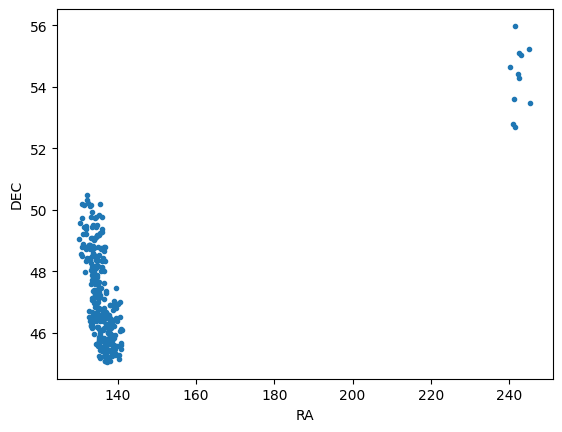

In [22]:
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='.')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')
min(reduced_cat['PLATE'])

### Making a loop to check data names

In [5]:
plate_list=[]
for p,m,q in zip(small_cat['PLATE'],small_cat['MJD'],small_cat['FIBERID']):
    plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
plate_list=np.unique(plate_list)
plate_list
for i in range(169837):
    print("--", i + 1)
    print("Label:", plate_list[i])


-- 1
Label: 1000/spec-1000-52643-0522.fits
-- 2
Label: 1001/spec-1001-52670-0305.fits
-- 3
Label: 1001/spec-1001-52670-093.fits
-- 4
Label: 1002/spec-1002-52646-0345.fits
-- 5
Label: 1006/spec-1006-52708-0462.fits
-- 6
Label: 1006/spec-1006-52708-0470.fits
-- 7
Label: 1006/spec-1006-52708-0497.fits
-- 8
Label: 1007/spec-1007-52706-0208.fits
-- 9
Label: 1008/spec-1008-52707-0493.fits
-- 10
Label: 1010/spec-1010-52649-0200.fits
-- 11
Label: 1010/spec-1010-52649-0531.fits
-- 12
Label: 1015/spec-1015-52734-0172.fits
-- 13
Label: 1020/spec-1020-52721-0584.fits
-- 14
Label: 1023/spec-1023-52818-0139.fits
-- 15
Label: 1038/spec-1038-52673-0480.fits
-- 16
Label: 1041/spec-1041-52724-0209.fits
-- 17
Label: 1041/spec-1041-52724-0460.fits
-- 18
Label: 1043/spec-1043-52465-058.fits
-- 19
Label: 1044/spec-1044-52468-0253.fits
-- 20
Label: 1044/spec-1044-52468-0302.fits
-- 21
Label: 1045/spec-1045-52725-0248.fits
-- 22
Label: 1045/spec-1045-52725-0311.fits
-- 23
Label: 1045/spec-1045-52725-071.fits


Label: 3854/spec-3854-55247-0886.fits
-- 10715
Label: 3854/spec-3854-55247-090.fits
-- 10716
Label: 3854/spec-3854-55247-0914.fits
-- 10717
Label: 3854/spec-3854-55247-0920.fits
-- 10718
Label: 3854/spec-3854-55247-0938.fits
-- 10719
Label: 3854/spec-3854-55247-0940.fits
-- 10720
Label: 3854/spec-3854-55247-0944.fits
-- 10721
Label: 3854/spec-3854-55247-0966.fits
-- 10722
Label: 3854/spec-3854-55247-0968.fits
-- 10723
Label: 3855/spec-3855-55268-0102.fits
-- 10724
Label: 3855/spec-3855-55268-0104.fits
-- 10725
Label: 3855/spec-3855-55268-0120.fits
-- 10726
Label: 3855/spec-3855-55268-0152.fits
-- 10727
Label: 3855/spec-3855-55268-016.fits
-- 10728
Label: 3855/spec-3855-55268-018.fits
-- 10729
Label: 3855/spec-3855-55268-0202.fits
-- 10730
Label: 3855/spec-3855-55268-0214.fits
-- 10731
Label: 3855/spec-3855-55268-0234.fits
-- 10732
Label: 3855/spec-3855-55268-0240.fits
-- 10733
Label: 3855/spec-3855-55268-0254.fits
-- 10734
Label: 3855/spec-3855-55268-0268.fits
-- 10735
Label: 3855/spec

-- 20543
Label: 4043/spec-4043-55630-0696.fits
-- 20544
Label: 4043/spec-4043-55630-0742.fits
-- 20545
Label: 4043/spec-4043-55630-076.fits
-- 20546
Label: 4043/spec-4043-55630-0764.fits
-- 20547
Label: 4043/spec-4043-55630-0770.fits
-- 20548
Label: 4043/spec-4043-55630-0784.fits
-- 20549
Label: 4043/spec-4043-55630-08.fits
-- 20550
Label: 4043/spec-4043-55630-0834.fits
-- 20551
Label: 4043/spec-4043-55630-084.fits
-- 20552
Label: 4043/spec-4043-55630-0850.fits
-- 20553
Label: 4043/spec-4043-55630-0868.fits
-- 20554
Label: 4043/spec-4043-55630-088.fits
-- 20555
Label: 4043/spec-4043-55630-0896.fits
-- 20556
Label: 4043/spec-4043-55630-090.fits
-- 20557
Label: 4043/spec-4043-55630-0914.fits
-- 20558
Label: 4043/spec-4043-55630-0920.fits
-- 20559
Label: 4043/spec-4043-55630-0964.fits
-- 20560
Label: 4043/spec-4043-55630-0974.fits
-- 20561
Label: 4043/spec-4043-55630-0996.fits
-- 20562
Label: 4044/spec-4044-55359-0100.fits
-- 20563
Label: 4044/spec-4044-55359-0136.fits
-- 20564
Label: 404

-- 30348
Label: 4273/spec-4273-55506-0612.fits
-- 30349
Label: 4273/spec-4273-55506-0690.fits
-- 30350
Label: 4273/spec-4273-55506-0699.fits
-- 30351
Label: 4273/spec-4273-55506-0734.fits
-- 30352
Label: 4273/spec-4273-55506-0756.fits
-- 30353
Label: 4273/spec-4273-55506-0774.fits
-- 30354
Label: 4273/spec-4273-55506-0796.fits
-- 30355
Label: 4273/spec-4273-55506-0858.fits
-- 30356
Label: 4273/spec-4273-55506-0878.fits
-- 30357
Label: 4273/spec-4273-55506-0895.fits
-- 30358
Label: 4273/spec-4273-55506-0896.fits
-- 30359
Label: 4273/spec-4273-55506-0906.fits
-- 30360
Label: 4273/spec-4273-55506-0986.fits
-- 30361
Label: 4274/spec-4274-55508-0124.fits
-- 30362
Label: 4274/spec-4274-55508-0128.fits
-- 30363
Label: 4274/spec-4274-55508-0178.fits
-- 30364
Label: 4274/spec-4274-55508-0192.fits
-- 30365
Label: 4274/spec-4274-55508-020.fits
-- 30366
Label: 4274/spec-4274-55508-0214.fits
-- 30367
Label: 4274/spec-4274-55508-0248.fits
-- 30368
Label: 4274/spec-4274-55508-0256.fits
-- 30369
Label

-- 40511
Label: 4486/spec-4486-55588-0684.fits
-- 40512
Label: 4486/spec-4486-55588-0692.fits
-- 40513
Label: 4486/spec-4486-55588-0738.fits
-- 40514
Label: 4486/spec-4486-55588-0740.fits
-- 40515
Label: 4486/spec-4486-55588-076.fits
-- 40516
Label: 4486/spec-4486-55588-0764.fits
-- 40517
Label: 4486/spec-4486-55588-0766.fits
-- 40518
Label: 4486/spec-4486-55588-0772.fits
-- 40519
Label: 4486/spec-4486-55588-0796.fits
-- 40520
Label: 4486/spec-4486-55588-0798.fits
-- 40521
Label: 4486/spec-4486-55588-0808.fits
-- 40522
Label: 4486/spec-4486-55588-0820.fits
-- 40523
Label: 4486/spec-4486-55588-0829.fits
-- 40524
Label: 4486/spec-4486-55588-0837.fits
-- 40525
Label: 4486/spec-4486-55588-0838.fits
-- 40526
Label: 4486/spec-4486-55588-084.fits
-- 40527
Label: 4486/spec-4486-55588-0846.fits
-- 40528
Label: 4486/spec-4486-55588-0848.fits
-- 40529
Label: 4486/spec-4486-55588-0869.fits
-- 40530
Label: 4486/spec-4486-55588-0876.fits
-- 40531
Label: 4486/spec-4486-55588-0890.fits
-- 40532
Label:

-- 49071
Label: 4650/spec-4650-55648-0370.fits
-- 49072
Label: 4650/spec-4650-55648-0388.fits
-- 49073
Label: 4650/spec-4650-55648-0392.fits
-- 49074
Label: 4650/spec-4650-55648-0404.fits
-- 49075
Label: 4650/spec-4650-55648-0418.fits
-- 49076
Label: 4650/spec-4650-55648-0422.fits
-- 49077
Label: 4650/spec-4650-55648-043.fits
-- 49078
Label: 4650/spec-4650-55648-0432.fits
-- 49079
Label: 4650/spec-4650-55648-0442.fits
-- 49080
Label: 4650/spec-4650-55648-0446.fits
-- 49081
Label: 4650/spec-4650-55648-0448.fits
-- 49082
Label: 4650/spec-4650-55648-0452.fits
-- 49083
Label: 4650/spec-4650-55648-048.fits
-- 49084
Label: 4650/spec-4650-55648-0486.fits
-- 49085
Label: 4650/spec-4650-55648-054.fits
-- 49086
Label: 4650/spec-4650-55648-060.fits
-- 49087
Label: 4650/spec-4650-55648-0606.fits
-- 49088
Label: 4650/spec-4650-55648-0642.fits
-- 49089
Label: 4650/spec-4650-55648-0670.fits
-- 49090
Label: 4650/spec-4650-55648-0684.fits
-- 49091
Label: 4650/spec-4650-55648-0706.fits
-- 49092
Label: 4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




-- 131987
Label: 6431/spec-6431-56311-0240.fits
-- 131988
Label: 6431/spec-6431-56311-0254.fits
-- 131989
Label: 6431/spec-6431-56311-0258.fits
-- 131990
Label: 6431/spec-6431-56311-0262.fits
-- 131991
Label: 6431/spec-6431-56311-0274.fits
-- 131992
Label: 6431/spec-6431-56311-0282.fits
-- 131993
Label: 6431/spec-6431-56311-0288.fits
-- 131994
Label: 6431/spec-6431-56311-0292.fits
-- 131995
Label: 6431/spec-6431-56311-0294.fits
-- 131996
Label: 6431/spec-6431-56311-0302.fits
-- 131997
Label: 6431/spec-6431-56311-0322.fits
-- 131998
Label: 6431/spec-6431-56311-0338.fits
-- 131999
Label: 6431/spec-6431-56311-0342.fits
-- 132000
Label: 6431/spec-6431-56311-0346.fits
-- 132001
Label: 6431/spec-6431-56311-0361.fits
-- 132002
Label: 6431/spec-6431-56311-0390.fits
-- 132003
Label: 6431/spec-6431-56311-0392.fits
-- 132004
Label: 6431/spec-6431-56311-040.fits
-- 132005
Label: 6431/spec-6431-56311-0411.fits
-- 132006
Label: 6431/spec-6431-56311-0416.fits
-- 132007
Label: 6431/spec-6431-56311-04

Label: 6639/spec-6639-56385-089.fits
-- 142836
Label: 6639/spec-6639-56385-0894.fits
-- 142837
Label: 6639/spec-6639-56385-0916.fits
-- 142838
Label: 6639/spec-6639-56385-096.fits
-- 142839
Label: 6639/spec-6639-56385-0970.fits
-- 142840
Label: 6639/spec-6639-56385-0976.fits
-- 142841
Label: 6639/spec-6639-56385-0984.fits
-- 142842
Label: 664/spec-664-52174-0229.fits
-- 142843
Label: 664/spec-664-52174-0308.fits
-- 142844
Label: 664/spec-664-52174-0389.fits
-- 142845
Label: 664/spec-664-52174-093.fits
-- 142846
Label: 6640/spec-6640-56385-010.fits
-- 142847
Label: 6640/spec-6640-56385-0100.fits
-- 142848
Label: 6640/spec-6640-56385-0122.fits
-- 142849
Label: 6640/spec-6640-56385-0138.fits
-- 142850
Label: 6640/spec-6640-56385-0160.fits
-- 142851
Label: 6640/spec-6640-56385-0188.fits
-- 142852
Label: 6640/spec-6640-56385-0199.fits
-- 142853
Label: 6640/spec-6640-56385-0224.fits
-- 142854
Label: 6640/spec-6640-56385-0228.fits
-- 142855
Label: 6640/spec-6640-56385-0264.fits
-- 142856
Labe

Label: 6805/spec-6805-56442-0170.fits
-- 152331
Label: 6805/spec-6805-56442-0178.fits
-- 152332
Label: 6805/spec-6805-56442-0190.fits
-- 152333
Label: 6805/spec-6805-56442-0191.fits
-- 152334
Label: 6805/spec-6805-56442-0193.fits
-- 152335
Label: 6805/spec-6805-56442-0206.fits
-- 152336
Label: 6805/spec-6805-56442-0222.fits
-- 152337
Label: 6805/spec-6805-56442-0230.fits
-- 152338
Label: 6805/spec-6805-56442-0240.fits
-- 152339
Label: 6805/spec-6805-56442-0260.fits
-- 152340
Label: 6805/spec-6805-56442-0272.fits
-- 152341
Label: 6805/spec-6805-56442-0278.fits
-- 152342
Label: 6805/spec-6805-56442-0284.fits
-- 152343
Label: 6805/spec-6805-56442-0290.fits
-- 152344
Label: 6805/spec-6805-56442-030.fits
-- 152345
Label: 6805/spec-6805-56442-0302.fits
-- 152346
Label: 6805/spec-6805-56442-0310.fits
-- 152347
Label: 6805/spec-6805-56442-0316.fits
-- 152348
Label: 6805/spec-6805-56442-0328.fits
-- 152349
Label: 6805/spec-6805-56442-0336.fits
-- 152350
Label: 6805/spec-6805-56442-0342.fits
-- 

-- 159867
Label: 7096/spec-7096-56683-0312.fits
-- 159868
Label: 7096/spec-7096-56683-0318.fits
-- 159869
Label: 7096/spec-7096-56683-0322.fits
-- 159870
Label: 7096/spec-7096-56683-0330.fits
-- 159871
Label: 7096/spec-7096-56683-0344.fits
-- 159872
Label: 7096/spec-7096-56683-0353.fits
-- 159873
Label: 7096/spec-7096-56683-0354.fits
-- 159874
Label: 7096/spec-7096-56683-036.fits
-- 159875
Label: 7096/spec-7096-56683-0372.fits
-- 159876
Label: 7096/spec-7096-56683-0374.fits
-- 159877
Label: 7096/spec-7096-56683-0384.fits
-- 159878
Label: 7096/spec-7096-56683-04.fits
-- 159879
Label: 7096/spec-7096-56683-0412.fits
-- 159880
Label: 7096/spec-7096-56683-0436.fits
-- 159881
Label: 7096/spec-7096-56683-0438.fits
-- 159882
Label: 7096/spec-7096-56683-0440.fits
-- 159883
Label: 7096/spec-7096-56683-0448.fits
-- 159884
Label: 7096/spec-7096-56683-0462.fits
-- 159885
Label: 7096/spec-7096-56683-0464.fits
-- 159886
Label: 7096/spec-7096-56683-0469.fits
-- 159887
Label: 7096/spec-7096-56683-0500.

-- 166876
Label: 7339/spec-7339-56813-0513.fits
-- 166877
Label: 7339/spec-7339-56813-0562.fits
-- 166878
Label: 7339/spec-7339-56813-0727.fits
-- 166879
Label: 734/spec-734-52224-0344.fits
-- 166880
Label: 7340/spec-7340-56726-0305.fits
-- 166881
Label: 7340/spec-7340-56726-0325.fits
-- 166882
Label: 7340/spec-7340-56825-0586.fits
-- 166883
Label: 7340/spec-7340-56825-0987.fits
-- 166884
Label: 7340/spec-7340-56829-0430.fits
-- 166885
Label: 7340/spec-7340-56829-0590.fits
-- 166886
Label: 7340/spec-7340-56829-0677.fits
-- 166887
Label: 7340/spec-7340-56829-0895.fits
-- 166888
Label: 7340/spec-7340-56833-0914.fits
-- 166889
Label: 7340/spec-7340-56837-0816.fits
-- 166890
Label: 7340/spec-7340-56837-098.fits
-- 166891
Label: 7374/spec-7374-56751-0104.fits
-- 166892
Label: 7374/spec-7374-56751-0120.fits
-- 166893
Label: 7374/spec-7374-56751-0125.fits
-- 166894
Label: 7374/spec-7374-56751-0136.fits
-- 166895
Label: 7374/spec-7374-56751-0140.fits
-- 166896
Label: 7374/spec-7374-56751-0147.

### Saving the file

In [6]:
np.savetxt('/home/colgoat/Jupyter/cat_fix16/DR16exct.txt',plate_list, fmt='%s', delimiter=',')